<a href="https://colab.research.google.com/github/Ed00107/sbd1/blob/main/%D0%9D%D0%BE%D1%83%D1%82%D0%B1%D1%83%D0%BA_%D0%BA_%D0%B7%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D1%8E_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Занятие 1


**СУБД** — система управления базами данных. 

Сначала установим специальную библиотеку-коннектор для подключения к удаленной базе данных. Для PostgreSQL эта библиотека называется psycopg2. Для других СУБД будут уже другие библиотеки, но со схожим интерфейсом (например, для MySQL можно использовать библиотеку pymysql).

In [ ]:
!pip install psycopg2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Ниже данные для подключения к удаленной базе данных. Мы указываем


1.   ip адрес сервера
2.   Имя пользователя (в СУБД)
3.   Пароль пользователя
4.   Имя базы данных на сервере к которой мы подключаемся

В рамках этого курса на удаленном сервере уже создано все необходимое для пользователей с названиями student_0, student_1, ... , student_9. Пароль совпадает с именем пользователя.

*Картинка с общим описанием того, что происходит:*

![](https://drive.google.com/uc?export=view&id=1zSoMrnLwKTNTlsZA0BCRUcBjVhjBPwXN)

In [ ]:
import psycopg2
import pandas as pd
import json

DB_HOST = 'de-edu-db.chronosavant.ru'
DB_USER = 'da11'
DB_USER_PASSWORD = 'gandalfthegrey'
DB_NAME = 'edu'

Схема учебной базы данных King's Corporation

![](https://drive.google.com/uc?export=view&id=1Bx3NlfuBk5s1fOCQqDtvz-fh2Z8OANVL)

Для начала, создадим объект соединения с базой данных, который будет хранить нашу текущую сессию и авторизационные данные. Без этого мы не сможем делать запросы к удаленному серверу.

In [ ]:
conn = psycopg2.connect(host=DB_HOST, user=DB_USER, password=DB_USER_PASSWORD, dbname=DB_NAME)
conn

<connection object at 0x7f6064d63980; dsn: 'user=da11 password=xxx dbname=edu host=de-edu-db.chronosavant.ru', closed: 0>

### Убедительная просьба
При работе над домашним заданием, а также в работе в дальнейшем не пренебрегать использованием так называемых sql formatter-ов, которые приведут ваш длинный запрос в более читабельный вид. 

Можно пользоваться, например, одним из этих:
1. https://sqlformat.org/
2. https://www.freeformatter.com/sql-formatter.html
3. http://www.dpriver.com/pp/sqlformat.htm

# SELECT
Самый частый запрос к базе данных, конечно, как правило на выборку данных. Поэтому очень важно освоить базовые навыки. В этой части мы с вами рассмотрим простейшие запросы к таблицам учебной базы King's Corporation (sample_db).

Полный синтаксис запроса SELECT в postgresql можно найти [здесь](https://postgrespro.ru/docs/postgrespro/9.6/sql-select)

Итак первый простейший запрос на выборку. Мы пользуемся специальной функцией pandas, которая отправляет запрос на удаленный сервер, и инициализирует ответ от сервера как уже привычный нам pandas DataFrame. Мы могли бы направлять наши запросы напрямую с помощью psycopg2, тогда нам бы вернулся массив кортежей, которые мы могли бы уже самостоятельно обработать как нам нужно, но в данной ситуации метод read_sql_query для нас более удобен. Обратите внимание, что вторым параметром нужно передать объект, хранящий информацию о нашем текущем соединении с базой данных.

SQL удобен тем, что запросы можно проговаривать в голове.

В данном случае это будет звучать как: "ВЗЯТЬ ВСЕ КОЛОНКИ ИЗ ТАБЛИЦЫ employee". 

Т.е * означает все колонки.

Часть между ключевыми словами SELECT и FROM называют **проекцией**.

In [ ]:
pd.read_sql_query("SELECT * FROM da.employee", conn)

,employee_id,last_name,first_name,middle_initial,manager_id,job_id,hire_date,salary,commission,department_id
0,7369,SMITH,JOHN,Q,7902.0,667,1984-12-17,800.0,NaN,20
1,7499,ALLEN,KEVIN,J,7698.0,670,1985-02-20,1600.0,300.0,30
2,7505,DOYLE,JEAN,K,7839.0,671,1985-04-04,2850.0,NaN,13
3,7506,DENNIS,LYNN,S,7839.0,671,1985-05-15,2750.0,NaN,23
4,7507,BAKER,LESLIE,D,7839.0,671,1985-06-10,2200.0,NaN,14
5,7521,WARD,CYNTHIA,D,7698.0,670,1985-02-22,1250.0,500.0,30
6,7555,PETERS,DANIEL,T,7505.0,670,1985-03-31,1250.0,300.0,13
7,7557,SHAW,KAREN,P,7505.0,670,1985-04-02,1250.0,1200.0,13
8,7560,DUNCAN,SARAH,S,7506.0,670,1985-05-31,1250.0,NaN,23
9,7564,LANGE,GREGORY,J,7506.0,670,1985-06-01,1250.0,300.0,23


С помощью инструкции WHERE мы можем отфильтровать значения. Внутри доступны любые [логические операции, а также вызов функций](https://www.postgresqltutorial.com/postgresql-where/). Выберем только те записи в которых зарплата (salary) > 1000. 

In [ ]:
pd.read_sql_query("""
SELECT * 
FROM   da.employee 
WHERE  salary > 1000 
""",conn)

,employee_id,last_name,first_name,middle_initial,manager_id,job_id,hire_date,salary,commission,department_id
0,7499,ALLEN,KEVIN,J,7698.0,670,1985-02-20,1600.0,300.0,30
1,7505,DOYLE,JEAN,K,7839.0,671,1985-04-04,2850.0,NaN,13
2,7506,DENNIS,LYNN,S,7839.0,671,1985-05-15,2750.0,NaN,23
3,7507,BAKER,LESLIE,D,7839.0,671,1985-06-10,2200.0,NaN,14
4,7521,WARD,CYNTHIA,D,7698.0,670,1985-02-22,1250.0,500.0,30
5,7555,PETERS,DANIEL,T,7505.0,670,1985-03-31,1250.0,300.0,13
6,7557,SHAW,KAREN,P,7505.0,670,1985-04-02,1250.0,1200.0,13
7,7560,DUNCAN,SARAH,S,7506.0,670,1985-05-31,1250.0,NaN,23
8,7564,LANGE,GREGORY,J,7506.0,670,1985-06-01,1250.0,300.0,23
9,7566,JONES,TERRY,M,7839.0,671,1985-04-02,2975.0,NaN,20


Условие может быть и более сложным, например

In [ ]:
pd.read_sql_query("""
SELECT * 
FROM   da.employee 
WHERE  ( salary > 1000 ) 
       AND ( department_id = 30 ) 
""",conn)

,employee_id,last_name,first_name,middle_initial,manager_id,job_id,hire_date,salary,commission,department_id
0,7499,allen,kevin,j,7698,670,1985-02-20,1600.0,300.0,30
1,7521,ward,cynthia,d,7698,670,1985-02-22,1250.0,500.0,30
2,7654,martin,kenneth,j,7698,670,1985-09-28,1250.0,1400.0,30
3,7698,blake,marion,s,7839,671,1985-05-01,2850.0,NaN,30
4,7844,turner,mary,a,7698,670,1985-09-08,1500.0,0.0,30


AND - логическое И
OR - логическое ИЛИ
доступны операции сравнения >,<, =, != (<>)

Скобками мы можем задавать приоритет операций, рекомендую так делать даже если понятно в каком порядке будет происходить выполнение, так вы на 100% сможете быть уверены в том, что будет выведено то, что вы и имели ввиду.

In [ ]:
pd.read_sql_query("""
SELECT employee_id, 
       last_name, 
       department_id, 
       salary 
FROM   da.employee 
WHERE  ( department_id = 30 ) 
       AND ( salary >= 800 
             AND salary <= 1000 ) 
""",conn)

,employee_id,last_name,department_id,salary
0,7900,james,30,950.0


Предположим, что нам надо вывести людей с зарплатой в каком-то диапазоне. Для этого есть 2 варианта

In [ ]:
# вар 1
pd.read_sql_query("""
SELECT * 
FROM   da.employee 
WHERE  salary >= 1000 
       AND salary <= 1500 
""",conn)

,employee_id,last_name,first_name,middle_initial,manager_id,job_id,hire_date,salary,commission,department_id
0,7521,ward,cynthia,d,7698,670,1985-02-22,1250.0,500.0,30
1,7555,peters,daniel,t,7505,670,1985-03-31,1250.0,300.0,13
2,7557,shaw,karen,p,7505,670,1985-04-02,1250.0,1200.0,13
3,7560,duncan,sarah,s,7506,670,1985-05-31,1250.0,NaN,23
4,7564,lange,gregory,j,7506,670,1985-06-01,1250.0,300.0,23
5,7600,porter,raymond,y,7505,670,1985-04-15,1250.0,900.0,13
6,7654,martin,kenneth,j,7698,670,1985-09-28,1250.0,1400.0,30
7,7789,west,livia,n,7506,670,1985-04-04,1500.0,1000.0,23
8,7820,ross,paul,s,7505,670,1985-06-01,1300.0,800.0,43
9,7844,turner,mary,a,7698,670,1985-09-08,1500.0,0.0,30


Но мы можем использовать инструкцию BETWEEN ... AND ... вместо явного указания знаками. Получается, это что-то вроде синтаксического сахара.

In [ ]:
# вар 2
pd.read_sql_query("""
SELECT * 
FROM   da.employee 
WHERE  salary BETWEEN 1000 AND 1500 
""",conn)

,employee_id,last_name,first_name,middle_initial,manager_id,job_id,hire_date,salary,commission,department_id
0,7521,ward,cynthia,d,7698,670,1985-02-22,1250.0,500.0,30
1,7555,peters,daniel,t,7505,670,1985-03-31,1250.0,300.0,13
2,7557,shaw,karen,p,7505,670,1985-04-02,1250.0,1200.0,13
3,7560,duncan,sarah,s,7506,670,1985-05-31,1250.0,NaN,23
4,7564,lange,gregory,j,7506,670,1985-06-01,1250.0,300.0,23
5,7600,porter,raymond,y,7505,670,1985-04-15,1250.0,900.0,13
6,7654,martin,kenneth,j,7698,670,1985-09-28,1250.0,1400.0,30
7,7789,west,livia,n,7506,670,1985-04-04,1500.0,1000.0,23
8,7820,ross,paul,s,7505,670,1985-06-01,1300.0,800.0,43
9,7844,turner,mary,a,7698,670,1985-09-08,1500.0,0.0,30


У нас также может возникнуть задача поиска в каком-то ограниченном списке значений. Для такой задачи также есть 2 варианта.

In [ ]:
# вар 1.
pd.read_sql_query("""
SELECT * 
FROM   da.employee 
WHERE  first_name = 'cynthia' 
        OR first_name = 'gregory' 
        OR first_name = 'kenneth' 
""",conn)

,employee_id,last_name,first_name,middle_initial,manager_id,job_id,hire_date,salary,commission,department_id
0,7521,ward,cynthia,d,7698,670,1985-02-22,1250.0,500.0,30
1,7564,lange,gregory,j,7506,670,1985-06-01,1250.0,300.0,23
2,7654,martin,kenneth,j,7698,670,1985-09-28,1250.0,1400.0,30


Или, используя встроенную конструкцию IN, сделаем этот запрос покороче.

In [ ]:
# вар 2.
pd.read_sql_query("""
SELECT * 
FROM   da.employee 
WHERE  first_name IN ( 'cynthia', 'gregory', 'kenneth' ) 
""",conn)

Мы также можем переименовывать колонки в проекции, и рассматриваемые таблицы в момент запроса с помощью элиасов (псевдонимов). Так мы выведем колонки employee_id и last_name у всех записей в которых job_id = 667

In [ ]:
pd.read_sql_query("""
SELECT employee_id, 
       last_name AS "фамилия" 
FROM   da.employee AS t1 
WHERE  t1.job_id = 667 
    """, conn)

,employee_id,фамилия
0,7369,smith
1,7876,adams
2,7900,james
3,7919,douglas
4,7934,miller
5,7950,jensen
6,7954,murray


Мы можем указать порядок сортировки наших объектов с помощью конструкции ORDER BY. Она принимает набор колонок (или функций от колонок) с указанием типа сортировки (по умолчанию по возрастанию ASC - ascending, а также по убыванию DESC - descending). Через запятую можно указать сразу несколько таких колонок.

In [ ]:
pd.read_sql_query("""
SELECT employee_id, 
       last_name, 
       department_id, 
       salary 
FROM   da.employee 
WHERE  ( salary >= 800 
         AND salary <= 1000 ) 
ORDER  BY salary DESC 
""",conn) 

,employee_id,last_name,department_id,salary
0,7900,james,30,950.0
1,7369,smith,20,800.0
2,7919,douglas,12,800.0


Можно сортировать по нескольким полям сразу

In [ ]:
pd.read_sql_query("""
SELECT employee_id, 
       last_name, 
       department_id, 
       salary 
FROM   da.employee 
WHERE  ( salary >= 800 
         AND salary <= 2000 ) 
ORDER  BY salary DESC, 
          employee_id ASC 
""",conn)

,employee_id,last_name,department_id,salary
0,7676,sommers,34,1850.0
1,7609,lewis,24,1800.0
2,7499,allen,30,1600.0
3,7789,west,23,1500.0
4,7844,turner,30,1500.0
5,7820,ross,43,1300.0
6,7934,miller,10,1300.0
7,7521,ward,30,1250.0
8,7555,peters,13,1250.0
9,7557,shaw,13,1250.0


Инструкция DISTINCT выведет только уникальные строки, и операция применяется ко всей проекции (для всех колонок объекта в результате).

In [ ]:
pd.read_sql_query("""
SELECT DISTINCT salary, 
                department_id 
FROM   da.employee 
ORDER  BY salary, 
          department_id 
""", conn)

,salary,department_id
0,750.0,13
1,750.0,23
2,800.0,12
3,800.0,20
4,950.0,30
5,1100.0,20
6,1250.0,13
7,1250.0,23
8,1250.0,30
9,1300.0,10


Очень удобна конструкция LIKE для фильтрации по строкам. 

Синтаксис этой конструкции см. в презентации на слайде 17.

In [ ]:
pd.read_sql_query("""
SELECT last_name 
FROM   da.employee 
WHERE  last_name LIKE '___e%' 
""", conn)

,last_name
0,allen
1,baker
2,peters
3,jones
4,alberts
5,james
6,roberts


Кроме того, мы можем группировать объекты по значениям колонок и подсчитывать агрегационные функции. Например, посчитаем часто встречающиеся метрики по зарплате в группировке по департаментам.

обычно в любой СУБД доступны следующие агрегационные функции:
* COUNT количество
* AVG среднее
* MAX максимум
* MIN минимум
* SUM сумма

Обратите внимание, что при группировке, каждая группа "схлопывается/аггрегируется" в одно значение. А значит все поля, участвующие в группировке должны присутствовать в проекции, иначе вы увидите ошибку.

In [ ]:
pd.read_sql_query("""
SELECT department_id, 
       Avg(salary)   AS avg_salary, 
       Max(salary)   AS max_salary, 
       Min(salary)   AS min_salary, 
       Sum(salary)   AS sum_salary, 
       Count(salary) AS cnt_salary 
FROM  da.employee 
GROUP  BY department_id 
""", conn)

,department_id,avg_salary,max_salary,min_salary,sum_salary,cnt_salary
0,34,1850.000000,1850.0,1850.0,1850.0,1
1,43,1300.000000,1300.0,1300.0,1300.0,1
2,10,2916.666667,5000.0,1300.0,8750.0,3
3,12,2418.750000,3000.0,800.0,9675.0,4
4,24,1800.000000,1800.0,1800.0,1800.0,1
5,30,1566.666667,2850.0,950.0,9400.0,6
6,14,2200.000000,2200.0,2200.0,2200.0,1
7,20,2175.000000,3000.0,800.0,10875.0,5
8,13,1470.000000,2850.0,750.0,7350.0,5
9,23,1500.000000,2750.0,750.0,7500.0,5


Конструкция HAVING позволяет нам делать дополнительную фильтрацию после основного запроса с группировкой. Например, мы можем сначала посчитать среднюю зарплату для каждого отдела, а потом отдельно указать, что нам нужны только те отделы в которых средняя зарплата больше 1000.

In [ ]:
pd.read_sql_query("""
SELECT department_id, 
       Avg(salary) AS avg_salary 
FROM  da.employee 
GROUP  BY department_id 
HAVING Avg(salary) > 1500 
LIMIT  3 
""", conn)

,department_id,avg_salary
0,34,1850.000000
1,10,2916.666667
2,12,2418.750000


Для того чтобы посмотреть набор таблиц, имеющихся в базе данных, нужно сделать запрос к системной базе данных и соответствующим системным таблицам, которые хранят метаданные о структурах, создаваемых пользователями в СУБД (это просто запрос из гугла). 

In [ ]:
pd.read_sql_query("""
SELECT * 
FROM   pg_catalog.pg_tables 
WHERE  schemaname != 'pg_catalog' 
       AND schemaname != 'information_schema' 
""", conn)

,schemaname,tablename,tableowner,tablespace,hasindexes,hasrules,hastriggers,rowsecurity
0,public,job,postgres,None,True,False,True,False
1,public,product,postgres,None,True,False,True,False
2,public,price,postgres,None,True,False,True,False
3,public,item,postgres,None,True,False,True,False
4,public,sales_order,postgres,None,True,False,True,False
5,public,employee,postgres,None,True,False,True,False
6,public,location,postgres,None,True,False,True,False
7,public,customer,postgres,None,True,False,True,False
8,public,department,postgres,None,True,False,True,False


Порядок выполнения операций следующий:

SELECT -> FROM -> WHERE -> GROUP BY -> HAVING -> ORDER BY -> LIMIT

LIMIT n ограничивает выборку n строчками.

# NULL


1.   NULL ~ можно интерпретировать как "неизвестно"/"отсутствует"/"неопределенность", но никак не как 0
2.   NULL = NULL -> False
3.   Нельзя сравнивать столбец с NULL. Т.е. нельзя писать такое: phone_number != NULL или credit_limit = NULL.
4.   Надо так: credit_limit IS NULL/ credit_limit IS NOT NULL.
5.   Если мы указываем в агрегатных функциях конкретный столбец для подсчёта, то NULL игнорируется. Так, например, SELECT COUNT(manager_id), посчитает все строки в которых manager_id IS NOT NULL, а вот такое выражение SELECT COUNT(*) посчитает и те строки в которых есть столбцы со значением IS NULL.
6.   NULL +/-* число -> NULL 



In [ ]:
pd.read_sql_query("""
SELECT * 
FROM   da.employee 
WHERE  1 = 1 
""", conn) # 1=1 всегда вычисляется в TRUE, поэтому...
# появится вся таблица

# None, np.nan --> это скорее всего NULL в выводе SQL сервера
# NULL в строковых колонках преобразуется pandas-ом в None
# NULL в числовых колонках преобразуется pandas-ом в np.nan

,employee_id,last_name,first_name,middle_initial,manager_id,job_id,hire_date,salary,commission,department_id
0,7369,smith,john,q,7902.0,667,1984-12-17,800.0,NaN,20
1,7499,allen,kevin,j,7698.0,670,1985-02-20,1600.0,300.0,30
2,7505,doyle,jean,k,7839.0,671,1985-04-04,2850.0,NaN,13
3,7506,dennis,lynn,s,7839.0,671,1985-05-15,2750.0,NaN,23
4,7507,baker,leslie,d,7839.0,671,1985-06-10,2200.0,NaN,14
5,7521,ward,cynthia,d,7698.0,670,1985-02-22,1250.0,500.0,30
6,7555,peters,daniel,t,7505.0,670,1985-03-31,1250.0,300.0,13
7,7557,shaw,karen,p,7505.0,670,1985-04-02,1250.0,1200.0,13
8,7560,duncan,sarah,s,7506.0,670,1985-05-31,1250.0,NaN,23
9,7564,lange,gregory,j,7506.0,670,1985-06-01,1250.0,300.0,23


In [ ]:
pd.read_sql_query("SELECT * FROM da.employee WHERE NULL = NULL", conn) # NULL = NULL -> False

,employee_id,last_name,first_name,middle_initial,manager_id,job_id,hire_date,salary,commission,department_id


In [ ]:
data = pd.read_sql_query("SELECT * FROM employee", conn)
data.head(5)

# NULL в pandas-е транслируется для числовых типов в NaN (not a number)
# а для строковых в None (ничего)

In [ ]:
# ТАК НЕ ДЕЛАЕМ
pd.read_sql_query("""
SELECT * 
FROM  da.employee 
WHERE  commission = NULL 
""", conn)

,employee_id,last_name,first_name,middle_initial,manager_id,job_id,hire_date,salary,commission,department_id


In [ ]:
# ДЕЛАЕМ ТАК
pd.read_sql_query("""
SELECT * 
FROM   da.employee 
WHERE  commission IS NULL 
""", conn)

,employee_id,last_name,first_name,middle_initial,manager_id,job_id,hire_date,salary,commission,department_id
0,7369,smith,john,q,7902.0,667,1984-12-17,800.0,None,20
1,7505,doyle,jean,k,7839.0,671,1985-04-04,2850.0,None,13
2,7506,dennis,lynn,s,7839.0,671,1985-05-15,2750.0,None,23
3,7507,baker,leslie,d,7839.0,671,1985-06-10,2200.0,None,14
4,7560,duncan,sarah,s,7506.0,670,1985-05-31,1250.0,None,23
5,7566,jones,terry,m,7839.0,671,1985-04-02,2975.0,None,20
6,7569,alberts,chris,l,7839.0,671,1985-04-06,3000.0,None,12
7,7609,lewis,richard,m,7507.0,668,1985-04-16,1800.0,None,24
8,7676,sommers,denise,d,7507.0,668,1985-04-19,1850.0,None,34
9,7698,blake,marion,s,7839.0,671,1985-05-01,2850.0,None,30


Функция COALESCE возвращает первое значение, которое вычисляется не в NULL, и она очень удобна для обработки пропусков.

In [ ]:
pd.read_sql_query("""
SELECT COALESCE(commission, salary, 999) 
FROM   da.employee 
WHERE  commission IS NULL 
""", conn)

,coalesce
0,800.0
1,2850.0
2,2750.0
3,2200.0
4,1250.0
5,2975.0
6,3000.0
7,1800.0
8,1850.0
9,2850.0


Посчитаем количество людей у которых нет коммиссионных

In [ ]:
pd.read_sql_query("""
SELECT Count(employee_id) AS "Кол-во сотрудников" 
FROM  da.employee 
WHERE  commission IS NULL 
""", conn)

,Кол-во сотрудников
0,22


# Встроенные функции
В любой СУБД будет представлен большой спектр функций для работы с разными типами данных. Полный список приводить не имеет смысла, обращаемся к документации.

* [Работа со строками](https://postgrespro.ru/docs/postgrespro/9.5/functions-string)
* [Работа с датами](https://postgrespro.ru/docs/postgrespro/10/functions-datetime)
* [Работа с числами](https://postgrespro.ru/docs/postgrespro/9.5/functions-math)

Например, CONCAT функция конкатенации строк

In [ ]:
pd.read_sql_query("SELECT CONCAT(first_name, ' ', last_name) as concatenated FROM da.employee", conn)

,concatenated
0,JOHN SMITH
1,KEVIN ALLEN
2,JEAN DOYLE
3,LYNN DENNIS
4,LESLIE BAKER
5,CYNTHIA WARD
6,DANIEL PETERS
7,KAREN SHAW
8,SARAH DUNCAN
9,GREGORY LANGE


Или SUBSTR, функция взятия подстроки

In [ ]:
pd.read_sql_query("SELECT SUBSTR(last_name, 2, 2) FROM da.employee", conn)

Или набор функций для работы с числами такие как:
* ROUND округление 
* FLOOR, отбрасывание дробной части
* CEIL, округление вверх


In [ ]:
pd.read_sql_query("""
SELECT Round(salary / 3, 2) AS divided_3_salary, 
       Ceil(salary / 3)     AS ceil_divided_3_salary, 
       Floor(salary / 3)    AS floor_divided_3_salary 
FROM   da.employee 
""", conn)

# INSERT
Вставка в sql таблицы происходит довольно прямолинейно.

Основные варианты это

* INSERT INTO table (<тут через запятую перечисляем колонки>) VALUES (<тут через запятую перечисляем значения в том же порядке, в котором передаем колонки>)
* INSERT INTO table VALUES (<тогда мы должны перечислить значения для всех колонок таблицы>)
* INSERT INTO table (<тут через запятую перечисляем колонки>) VALUES (<тут через запятую перечисляем значения в том же порядке, в котором передаем колонки>), (<тут через запятую перечисляем значения в том же порядке, в котором передаем колонки>), (<тут через запятую перечисляем значения в том же порядке, в котором передаем колонки>), (<тут через запятую перечисляем значения в том же порядке, в котором передаем колонки>), .......... так мы можем вставить сразу несколько значений в таблицу

In [ ]:
pd.read_sql_query("SELECT * FROM da.product", conn)

,product_id,description
0,100860,ace tennis racket i
1,100861,ace tennis racket ii
2,100870,ace tennis balls-3 pack
3,100871,ace tennis balls-6 pack
4,100890,ace tennis net
5,101860,sp tennis racket
6,101863,sp junior racket
7,102130,"rh: ""guide to tennis"""
8,200376,sb energy bar-6 pack
9,200380,sb vita snack-6 pack


Добавим в таблицу еще одну запись о продукте

In [ ]:
conn = psycopg2.connect(host=DB_HOST, user=DB_USER, password=DB_USER_PASSWORD, dbname=DB_NAME)

query = """
INSERT INTO da.product (product_id, description) VALUES (1234567, 'test3')
""" # наш запрос
# надо его выполнить


# изменения происходят через специальный интерфейс -- объект-курсор базы данных
cursor = conn.cursor()

cursor.execute(query) # выполняем наш запрос

conn.commit() # применяем изменения

Обратите внимание, что необходимо применить изменения (commit()) или откатить их (rollback())! Иначе таблица еще не изменена физически на сервере. Это защитный транзакционный механизм. Подробнее об этом можно почитать [здесь](https://habr.com/ru/post/446662/). Механизм транзакций остается за рамками нашего курса. 

In [ ]:
pd.read_sql_query("SELECT * FROM da.product", conn)

,product_id,description
0,100860,ace tennis racket i
1,100861,ace tennis racket ii
2,100870,ace tennis balls-3 pack
3,100871,ace tennis balls-6 pack
4,100890,ace tennis net
5,101860,sp tennis racket
6,101863,sp junior racket
7,102130,"rh: ""guide to tennis"""
8,200376,sb energy bar-6 pack
9,200380,sb vita snack-6 pack


Если нам нужно вставить сразу много данных, то мы можем просто выполнять запрос по одному в цикле, подставляя нужные значения в шаблон запроса

In [ ]:
products_data = {
      123456: 'test1',
      111111: 'test2',
      222222: 'test3',
      333333: 'test4',
      444444: 'test5',
    }

# задание, внести все записи в таблицу product 
# используя функцию .format() для работы со строками
query_template = """
INSERT INTO da.product (product_id, description) VALUES ({}, '{}')
"""

cursor = conn.cursor()
for pr_id, desc in products_data.items():
  query = query_template.format(pr_id, desc)
  print(query)
  cursor.execute(query)

conn.commit()


INSERT INTO product (product_id, description) VALUES (123456, 'test1')



Но это может быть дольше, чем использовать специальный механизм [executemany()](http://zetcode.com/python/psycopg2/), который по сути превращает шаблон запроса в вид 3-его типа INSERT из шапки этого раздела.

# UPDATE
Обновление делается довольно прямолинейно, мы указываем новые значения для колонок, и выбираем только то подмножество объектов, которое удовлетворяет условию WHERE.

In [ ]:
query = """
UPDATE da.product 
SET    description = 'test2 changed' 
WHERE  product_id = 123456 
"""

cursor = conn.cursor()

cursor.execute(query) 

conn.commit()

In [ ]:
pd.read_sql_query("select * from da.product", conn)

,product_id,description
0,100860,ace tennis racket i
1,100861,ace tennis racket ii
2,100870,ace tennis balls-3 pack
3,100871,ace tennis balls-6 pack
4,100890,ace tennis net
5,101860,sp tennis racket
6,101863,sp junior racket
7,102130,"rh: ""guide to tennis"""
8,200376,sb energy bar-6 pack
9,200380,sb vita snack-6 pack


# DELETE
Удаление работает практически аналогично обновлению

In [ ]:
query = """
DELETE FROM da.product 
WHERE  product_id IN ( 999999, 123456 ) 
"""

cursor = conn.cursor()

cursor.execute(query)

conn.commit()

In [ ]:
pd.read_sql_query("select * from da.product", conn)

,product_id,description
0,100860,ace tennis racket i
1,100861,ace tennis racket ii
2,100870,ace tennis balls-3 pack
3,100871,ace tennis balls-6 pack
4,100890,ace tennis net
5,101860,sp tennis racket
6,101863,sp junior racket
7,102130,"rh: ""guide to tennis"""
8,200376,sb energy bar-6 pack
9,200380,sb vita snack-6 pack


Стоит явно закрыть соединение с базой данных после прекращения работы с ней

In [ ]:
conn.close()

# JOIN

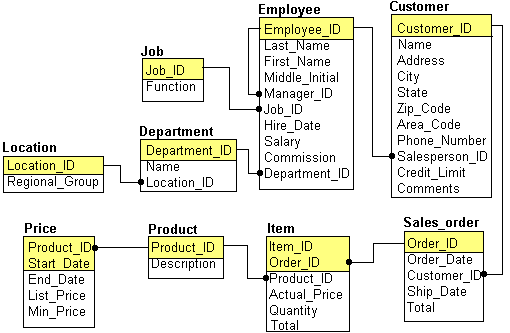


Эта часть посвящена соединениям таблиц, соединениями необходимо очень уверенно оперировать, чтобы не возникало проблем в повседневной практике написания запросов. 

Подключимся к базе

In [ ]:
!pip install psycopg2

In [ ]:
import psycopg2
import pandas as pd
# доступны student-ы от 0 до 9

DB_HOST = '89.223.95.138'
DB_USER = 'student_0'
DB_USER_PASSWORD = 'student_0'
DB_NAME = 'sample_db'

/usr/local/lib/python3.6/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [ ]:
conn = psycopg2.connect(host=DB_HOST, user=DB_USER, password=DB_USER_PASSWORD, dbname=DB_NAME)
pd.read_sql_query("select * from da.customer", conn)

,customer_id,name,address,city,state,zip_code,area_code,phone_number,salesperson_id,credit_limit,comments
0,100,jocksports,345 viewridge,belmont,ca,96711,415,5986609,7844,5000.0,very friendly people to work with -- sales rep...
1,101,tkb sport shop,490 boli rd.,redwood city,ca,94061,415,3681223,7521,10000.0,rep called 5/8 about change in order - contact...
2,102,vollyrite,9722 hamilton,burlingame,ca,95133,415,6443341,7654,7000.0,company doing heavy promotion beginning 10/89....
3,103,just tennis,hillview mall,burlingame,ca,97544,415,6779312,7521,3000.0,contact rep about new line of tennis rackets.
4,104,every mountain,574 surry rd.,cupertino,ca,93301,408,9962323,7499,10000.0,customer with high market share (23%) due to a...
5,105,k + t sports,3476 el paseo,santa clara,ca,91003,408,3769966,7844,5000.0,tends to order large amounts of merchandise at...
6,106,shape up,908 sequoia,palo alto,ca,94301,415,3649777,7521,6000.0,support intensive. orders small amounts (< 800...
7,107,womens sports,valco village,sunnyvale,ca,93301,408,9674398,7499,10000.0,first sporting goods store geared exclusively ...
8,108,north woods health and fitness supply center,98 lone pine way,hibbing,mn,55649,612,5669123,7844,8000.0,
9,201,stadium sports,47 irving pl.,new york,ny,10003,212,5555335,7557,10000.0,large general-purpose sports store with an aff...


Итак, похоже все хорошо

### Inner join
Внутреннее соединение берет подмножество всевозможных пар строк (декартово произведение) из первой (или левой) таблицы и второй (или правой) таблицы в которых выполняется условие переданное при соединении. Внутренние соединения не учитывают ситуации, когда значения столбцов, участвующих в логическом условии в левой или правой таблице отсутствуют. Если нужно работать с такими значениями, нужно пользоваться внешними соединениями (LEFT, RIGHT, FULL...) о которых речь пойдет чуть позже.

При соединении таблиц в общем синтаксис можно описать так:

```
SELECT
  ...
FROM
  <левая таблица> AS <опционально, псевдоним левой таблицы>
  <тип соединения> JOIN
  <правая таблица> AS <опционально, псевдоним правой таблицы>
  ON <логическое условие>
```



Подсчитаем кол-во строк в таблицах job и employee

In [ ]:
pd.read_sql_query("""
SELECT COUNT(*) FROM da.job
""", conn)

,count
0,6


In [ ]:
pd.read_sql_query("""
SELECT COUNT(*) FROM da.employee
""", conn)

,count
0,32


Таким образом, мы ожидаем 6*32 = 192 строки в результате декартова произведения

In [ ]:
# декартово произведение
pd.read_sql_query("""
SELECT
  employee_id,
  function,
  employee.job_id,
  job.job_id
FROM da.employee
CROSS JOIN da.job
""", conn)

,employee_id,function,job_id,job_id
0,7369,clerk,667,667
1,7499,clerk,670,667
2,7505,clerk,671,667
3,7506,clerk,671,667
4,7507,clerk,671,667
...,...,...,...,...
187,7916,president,669,672
188,7919,president,667,672
189,7934,president,667,672
190,7950,president,667,672


Видим, что получилось ровно 192 строки, используя логические условия на столбцы левой и правой таблиц, мы можем взять разные подмножества этого множества.

Стоит также отметить, что, конечно, на самом деле postgresql необязательно рассматривает все подмножество, имеют место внутренние оптимизации. Детали этого процесса остаются за рамками этого курса. Начать погружение в эту тему можно, например, с этой [статьи](https://www.cybertec-postgresql.com/en/join-strategies-and-performance-in-postgresql/). 

В качестве примера отобразим название должности каждого сотрудника. 

Обратите внимание, что мы указываем в логическом условии полные названия таблиц, потому что иначе sql сервер не поймет где какой столбец. В данном случае названия столбцов совпадают, тем не менее если они не совпадают и sql сервер и так может понять какие столбцы относятся к левой, а какие к правой таблице, все равно стоит указывать полные названия таблиц, так как это просто хороший стиль.

In [ ]:
pd.read_sql_query("""
SELECT
  employee_id,
  function,
  employee.job_id
FROM da.employee
INNER JOIN da.job
  ON employee.job_id = job.job_id
""", conn)

,employee_id,function,job_id
0,7954,clerk,667
1,7950,clerk,667
2,7934,clerk,667
3,7919,clerk,667
4,7900,clerk,667
5,7876,clerk,667
6,7369,clerk,667
7,7676,staff,668
8,7609,staff,668
9,7916,analyst,669


Названия таблиц могут быть довольно длинными, поэтому часто можно увидеть использование псевдонимов

In [ ]:
pd.read_sql_query("""
SELECT
  employee_id,
  function,
  l.job_id
FROM da.employee AS l
INNER JOIN da.job AS r
  ON l.job_id = r.job_id
""", conn)

,employee_id,function,job_id
0,7954,clerk,667
1,7950,clerk,667
2,7934,clerk,667
3,7919,clerk,667
4,7900,clerk,667
5,7876,clerk,667
6,7369,clerk,667
7,7676,staff,668
8,7609,staff,668
9,7916,analyst,669


Допустим, нам также понадобилось поле job_id. Если нужно отобразить колонку, которая есть и в той, и в другой таблице, нужно явно указать из какой таблицы мы берём эту колонку (потому что иначе опять таки неясно где столбец левой таблицы, а где столбец правой таблицы).

In [ ]:
pd.read_sql_query("""
SELECT
  employee_id,
  function,
  l.job_id,
  r.job_id
FROM da.employee AS l
INNER JOIN da.job AS r
  ON l.job_id = r.job_id
""", conn)

,employee_id,function,job_id,job_id
0,7954,clerk,667,667
1,7950,clerk,667,667
2,7934,clerk,667,667
3,7919,clerk,667,667
4,7900,clerk,667,667
5,7876,clerk,667,667
6,7369,clerk,667,667
7,7676,staff,668,668
8,7609,staff,668,668
9,7916,analyst,669,669


В принципе для INNER JOIN есть альтернативный синтаксис. Здесь запятая это по сути CROSS JOIN (декартово произведение), но предпочтительно все-таки делать соединение явно

In [ ]:
pd.read_sql_query("""
SELECT
  employee_id,
  function
FROM da.employee, job
WHERE
  employee.job_id = job.job_id
""", conn)

Ниже вы можете увидеть схему, описывающие детально как происходит процесс отбора при внутреннем соединении.

In [ ]:
"""
Job
===============
job_id function
===============
667    clerk

Employee
=====================================
employee_id last_name ... job_id ...
=====================================
7369        smith         667            -> 667 = 667 ? -> True -> соединяем с этой строкой
7876        adams         667            -> 667 = 667 ? -> True -> соединяем с этой строкой
7954        murray        668            -> 668 = 667 ? -> False -> не соединяем с этой строкой
"""

### LEFT (OUTER) JOIN
Левое внешнее соединение, позволяет нам обрабатывать ситуацию отсутствия значения в правой таблице. Левое внешнее соединение оставляет все строки левой таблицы.

In [ ]:
pd.read_sql_query("""
  SELECT * FROM da.product
""",conn)

,product_id,description
0,100860,ace tennis racket i
1,100861,ace tennis racket ii
2,100870,ace tennis balls-3 pack
3,100871,ace tennis balls-6 pack
4,100890,ace tennis net
5,101860,sp tennis racket
6,101863,sp junior racket
7,102130,"rh: ""guide to tennis"""
8,200376,sb energy bar-6 pack
9,200380,sb vita snack-6 pack


In [ ]:
# добавим несуществующий продукт в таблицу product
query = """
INSERT INTO da.product (product_id, description) VALUES (123456, 'test2')
""" # вот наш запрос
# теперь надо его выполнить
# изменения происходят через специальный интерфейс: объект-курсор базы данных
cursor = conn.cursor()

cursor.execute(query) # выполняем наш запрос

conn.commit() # подтверждаем транзакцию (передаём сигнал, всё, конец)


In [ ]:
pd.read_sql_query("""
  SELECT * FROM da.product
""",conn)

,product_id,description
0,100860,ace tennis racket i
1,100861,ace tennis racket ii
2,100870,ace tennis balls-3 pack
3,100871,ace tennis balls-6 pack
4,100890,ace tennis net
5,101860,sp tennis racket
6,101863,sp junior racket
7,102130,"rh: ""guide to tennis"""
8,200376,sb energy bar-6 pack
9,200380,sb vita snack-6 pack


Cоединим таблицу product с таблицей price по полю product_id

In [ ]:
pd.read_sql_query("""
SELECT * 
FROM da.product
INNER JOIN da.price
     ON product.product_id = price.product_id
""",conn)

,product_id,description,product_id,list_price,min_price,start_date,end_date
0,100860,ace tennis racket i,100860,30.0,24.00,1989-01-01,1989-12-31
1,100860,ace tennis racket i,100860,32.0,25.60,1990-01-01,1990-05-31
2,100860,ace tennis racket i,100860,35.0,28.00,1990-06-01,NaT
3,100861,ace tennis racket ii,100861,39.0,31.20,1989-01-01,1989-12-31
4,100861,ace tennis racket ii,100861,42.0,33.60,1990-01-01,1990-05-31
5,100861,ace tennis racket ii,100861,45.0,36.00,1990-06-01,NaT
6,100870,ace tennis balls-3 pack,100870,2.4,1.90,1989-01-01,1989-12-01
7,100870,ace tennis balls-3 pack,100870,2.8,2.40,1990-01-01,NaT
8,100871,ace tennis balls-6 pack,100871,5.6,4.80,1990-01-01,NaT
9,100871,ace tennis balls-6 pack,100871,4.8,3.20,1989-01-01,1989-12-01


Cоединим таблицу product с таблицей price по полю product_id, но теперь воспользуемся LEFT JOIN, отобразим записи о продуктах, которые никак не отражены в таблице price

In [ ]:
pd.read_sql_query("""
SELECT * 
FROM da.product
LEFT JOIN da.price
     ON product.product_id = price.product_id
""",conn)

,product_id,description,product_id,list_price,min_price,start_date,end_date
0,100860,ace tennis racket i,100860.0,30.0,24.00,1989-01-01,1989-12-31
1,100860,ace tennis racket i,100860.0,32.0,25.60,1990-01-01,1990-05-31
2,100860,ace tennis racket i,100860.0,35.0,28.00,1990-06-01,NaT
3,100861,ace tennis racket ii,100861.0,39.0,31.20,1989-01-01,1989-12-31
4,100861,ace tennis racket ii,100861.0,42.0,33.60,1990-01-01,1990-05-31
5,100861,ace tennis racket ii,100861.0,45.0,36.00,1990-06-01,NaT
6,100870,ace tennis balls-3 pack,100870.0,2.4,1.90,1989-01-01,1989-12-01
7,100870,ace tennis balls-3 pack,100870.0,2.8,2.40,1990-01-01,NaT
8,100871,ace tennis balls-6 pack,100871.0,5.6,4.80,1990-01-01,NaT
9,100871,ace tennis balls-6 pack,100871.0,4.8,3.20,1989-01-01,1989-12-01


Заметьте, что появились следующие записи

```
58	200381	test	NaN	NaN	NaN	NaT	NaT
59	123456	test2	NaN	NaN	NaN	NaT	NaT
```

для всех строчек левой таблицы для которых не нашлось пары в правой таблице


LEFT JOIN позволяет нам, например, вывести только те продукты о которых нет информации о стоимости

In [ ]:
pd.read_sql_query("""
SELECT * 
FROM da.product
LEFT JOIN da.price
     ON product.product_id = price.product_id
WHERE price.product_id IS NULL
""",conn)

,product_id,description,product_id,list_price,min_price,start_date,end_date
0,200381,test,None,None,None,None,None
1,123456,test2,None,None,None,None,None


Подробная схема работы приведена ниже

In [ ]:
"""
Job
===============
job_id function
===============
667    clerk
900    non-existent job
901    spy

Employee
=====================================
employee_id last_name ... job_id ...
=====================================
7369        smith         667            -> 667 = 667 ? -> True -> соединяем с этой строкой
7876        adams         667            -> 667 = 667 ? -> True -> соединяем с этой строкой
7954        murray        668            -> 668 = 667 ? -> False -> не соединяем с этой строкой

К этим строкам добавятся строки с идентификаторами из таблицы job, которых нет в таблице employee

+
======================================
job.job_id    employee.job_id  
======================================
900           NULL
901           NULL

"""

### RIGHT (OUTER) JOIN
То же что LEFT, но с другой стороны, получится тот же результат что и раньше.

Соединим таблицу product с таблицей price по полю product_id

In [ ]:
pd.read_sql_query("""
SELECT * 
FROM da.price
RIGHT JOIN da.product
     ON product.product_id = price.product_id
""",conn)

,product_id,list_price,min_price,start_date,end_date,product_id,description
0,100860.0,30.0,24.00,1989-01-01,1989-12-31,100860,ace tennis racket i
1,100860.0,32.0,25.60,1990-01-01,1990-05-31,100860,ace tennis racket i
2,100860.0,35.0,28.00,1990-06-01,NaT,100860,ace tennis racket i
3,100861.0,39.0,31.20,1989-01-01,1989-12-31,100861,ace tennis racket ii
4,100861.0,42.0,33.60,1990-01-01,1990-05-31,100861,ace tennis racket ii
5,100861.0,45.0,36.00,1990-06-01,NaT,100861,ace tennis racket ii
6,100870.0,2.4,1.90,1989-01-01,1989-12-01,100870,ace tennis balls-3 pack
7,100870.0,2.8,2.40,1990-01-01,NaT,100870,ace tennis balls-3 pack
8,100871.0,5.6,4.80,1990-01-01,NaT,100871,ace tennis balls-6 pack
9,100871.0,4.8,3.20,1989-01-01,1989-12-01,100871,ace tennis balls-6 pack


А если не менять местами будут сохранены все product_id из таблицы price

In [ ]:
pd.read_sql_query("""
SELECT * 
FROM da.product
RIGHT JOIN da.price
     ON product.product_id = price.product_id
""",conn)

,product_id,description,product_id,list_price,min_price,start_date,end_date
0,100860,ace tennis racket i,100860,30.0,24.00,1989-01-01,1989-12-31
1,100860,ace tennis racket i,100860,32.0,25.60,1990-01-01,1990-05-31
2,100860,ace tennis racket i,100860,35.0,28.00,1990-06-01,NaT
3,100861,ace tennis racket ii,100861,39.0,31.20,1989-01-01,1989-12-31
4,100861,ace tennis racket ii,100861,42.0,33.60,1990-01-01,1990-05-31
5,100861,ace tennis racket ii,100861,45.0,36.00,1990-06-01,NaT
6,100870,ace tennis balls-3 pack,100870,2.4,1.90,1989-01-01,1989-12-01
7,100870,ace tennis balls-3 pack,100870,2.8,2.40,1990-01-01,NaT
8,100871,ace tennis balls-6 pack,100871,5.6,4.80,1990-01-01,NaT
9,100871,ace tennis balls-6 pack,100871,4.8,3.20,1989-01-01,1989-12-01


### FULL OUTER JOIN
FULL OUTER JOIN объеденяет результаты LEFT и RIGHT JOIN-а в для случаев отсутствующих значений в левой или правой таблице.


In [ ]:
pd.read_sql_query("""
SELECT
    *
FROM da.product as t1
FULL JOIN da.price as t2
  ON t1.product_id = t2.product_id

""", conn)

,product_id,description,product_id,list_price,min_price,start_date,end_date
0,100860,ace tennis racket i,100860.0,30.0,24.00,1989-01-01,1989-12-31
1,100860,ace tennis racket i,100860.0,32.0,25.60,1990-01-01,1990-05-31
2,100860,ace tennis racket i,100860.0,35.0,28.00,1990-06-01,NaT
3,100861,ace tennis racket ii,100861.0,39.0,31.20,1989-01-01,1989-12-31
4,100861,ace tennis racket ii,100861.0,42.0,33.60,1990-01-01,1990-05-31
5,100861,ace tennis racket ii,100861.0,45.0,36.00,1990-06-01,NaT
6,100870,ace tennis balls-3 pack,100870.0,2.4,1.90,1989-01-01,1989-12-01
7,100870,ace tennis balls-3 pack,100870.0,2.8,2.40,1990-01-01,NaT
8,100871,ace tennis balls-6 pack,100871.0,5.6,4.80,1990-01-01,NaT
9,100871,ace tennis balls-6 pack,100871.0,4.8,3.20,1989-01-01,1989-12-01


### Соединение нескольких таблиц (больше 2)
Соединение нескольких таблиц делается весьма прямолинейно, единственное обратите внимание, что условие ON идет после каждого выражения JOIN. В других субд, например, mysql, можно встретить выражения вида


```
SELECT
  *
FROM
  a
  INNER JOIN
  b
  INNER JOIN
  c
  ON a.id = b.id AND b.id = c.id
```
Но в postgresql это не работает, и тот же код переписывается вот так:
```
SELECT
  *
FROM
  a
  INNER JOIN
  b
  ON a.id = b.id
  INNER JOIN
  c
  ON b.id = c.id
```


In [ ]:
pd.read_sql_query("""
SELECT
    *
FROM da.employee
INNER JOIN da.job
  ON employee.job_id = job.job_id
INNER JOIN da.department
  ON employee.department_id = department.department_id
""", conn)

,employee_id,last_name,first_name,middle_initial,manager_id,job_id,hire_date,salary,commission,department_id,job_id,function,department_id,name,location_id
0,7839,king,francis,a,NaN,672,1985-11-17,5000.0,NaN,10,672,president,10,accounting,122
1,7782,clark,carol,f,7839.0,671,1985-06-09,2450.0,NaN,10,671,manager,10,accounting,122
2,7934,miller,barbara,m,7782.0,667,1986-01-23,1300.0,NaN,10,667,clerk,10,accounting,122
3,7566,jones,terry,m,7839.0,671,1985-04-02,2975.0,NaN,20,671,manager,20,research,124
4,7788,scott,donald,t,7566.0,669,1986-12-09,3000.0,NaN,20,669,analyst,20,research,124
5,7902,ford,jennifer,d,7566.0,669,1985-12-03,3000.0,NaN,20,669,analyst,20,research,124
6,7369,smith,john,q,7902.0,667,1984-12-17,800.0,NaN,20,667,clerk,20,research,124
7,7876,adams,diane,g,7788.0,667,1987-01-12,1100.0,NaN,20,667,clerk,20,research,124
8,7698,blake,marion,s,7839.0,671,1985-05-01,2850.0,NaN,30,671,manager,30,sales,123
9,7499,allen,kevin,j,7698.0,670,1985-02-20,1600.0,300.0,30,670,salesperson,30,sales,123


# UNION
Объединяет результат двух запросов, при этом их проекции должны совпадать.

Есть дополнительная команда UNION ALL, которая оставит нам дубликаты (т.е сделает соединение без какой-либо дополнительной обработки значений).

In [ ]:
pd.read_sql_query("""
SELECT 
    *
FROM da.product as t1
LEFT JOIN da.price as t2
    ON t1.product_id = t2.product_id
UNION ALL
SELECT 
    *
FROM da.product as t1
RIGHT JOIN da.price as t2
    ON t1.product_id = t2.product_id
""", conn)

,product_id,description,product_id,list_price,min_price,start_date,end_date
0,100860,ace tennis racket i,100860.0,30.0,24.0,1989-01-01,1989-12-31
1,100860,ace tennis racket i,100860.0,32.0,25.6,1990-01-01,1990-05-31
2,100860,ace tennis racket i,100860.0,35.0,28.0,1990-06-01,NaT
3,100861,ace tennis racket ii,100861.0,39.0,31.2,1989-01-01,1989-12-31
4,100861,ace tennis racket ii,100861.0,42.0,33.6,1990-01-01,1990-05-31
...,...,...,...,...,...,...,...
113,105126,yellow jersey bottle cage,105126.0,6.0,5.0,1990-01-01,NaT
114,105126,yellow jersey bottle cage,105126.0,5.0,4.3,1989-01-01,1989-12-31
115,105127,yellow jersey frame pump,105127.0,6.0,5.0,1990-11-15,NaT
116,105128,yellow jersey saddle pack,105128.0,10.0,8.0,1990-11-15,NaT


А вот для сравнения обычный UNION.

In [ ]:
pd.read_sql_query("""
 SELECT 
    *
FROM da.product as t1
LEFT JOIN da.price as t2
    ON t1.product_id = t2.product_id
UNION
SELECT 
    *
FROM da.product as t1
RIGHT JOIN da.price as t2
    ON t1.product_id = t2.product_id
""", conn)

,product_id,description,product_id,list_price,min_price,start_date,end_date
0,105125,yellow jersey water bottle,105125.0,3.0,2.60,1990-01-01,NaT
1,100861,ace tennis racket ii,100861.0,45.0,36.00,1990-06-01,NaT
2,100871,ace tennis balls-6 pack,100871.0,4.8,3.20,1989-01-01,1989-12-01
3,103120,wiff softball bat i,103120.0,24.0,19.20,1990-01-01,1990-05-31
4,105123,yellow jersey bicycle helmet,105123.0,37.7,32.00,1990-01-01,1990-05-31
5,105125,yellow jersey water bottle,105125.0,2.0,1.70,1989-01-01,1989-12-31
6,103121,wiff softball bat ii,103121.0,28.8,23.00,1990-01-01,1990-05-31
7,100870,ace tennis balls-3 pack,100870.0,2.8,2.40,1990-01-01,NaT
8,100861,ace tennis racket ii,100861.0,42.0,33.60,1990-01-01,1990-05-31
9,103130,"wiff softball, small",103130.0,4.2,3.60,1990-01-01,NaT


С помощью UNION-а мы можем представить FULL OUTER JOIN:

In [ ]:
pd.read_sql_query("""
SELECT 
    t1.product_id,
    t1.description,
    t2.product_id,
    t2.list_price,
    t2.min_price,
    t2.start_date,
    t2.end_date
FROM da.product as t1
LEFT JOIN da.price as t2
    ON t1.product_id = t2.product_id
UNION
SELECT 
    t1.product_id,
    t1.description,
    t2.product_id,
    t2.list_price,
    t2.min_price,
    t2.start_date,
    t2.end_date
FROM da.product as t1
RIGHT JOIN da.price as t2
    ON t1.product_id = t2.product_id
""", conn)

Посмотрите также на разницу более детально на следующих искусственных примерах, обратите внимание на повторы.

In [ ]:
pd.read_sql_query("""
SELECT SUBSTR(function, 2,2), 1 FROM da.job
""",conn)

,substr,?column?
0,le,1
1,ta,1
2,na,1
3,al,1
4,an,1
5,re,1


In [ ]:
pd.read_sql_query("""
SELECT 1 FROM da.job
""",conn)

,?column?
0,1
1,1
2,1
3,1
4,1
5,1


In [ ]:
pd.read_sql_query("""
SELECT 2 FROM da.job
""",conn)

,?column?
0,2
1,2
2,2
3,2
4,2
5,2


In [ ]:
pd.read_sql_query("""
SELECT 1 FROM da.job
UNION ALL
SELECT 1 FROM da.job
""",conn) # реузльтат 12 строчек, не убираются дубликаты

,?column?
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [ ]:
pd.read_sql_query("""
SELECT 1 FROM da.job
UNION
SELECT 1 FROM da.job
""",conn) # убрали все дубликаты

,?column?
0,1


In [ ]:
pd.read_sql_query("""
SELECT 1 FROM da.job
UNION
SELECT 2 FROM da.job
""",conn) # выводит 1 и 2, дубликаты убираются

,?column?
0,2
1,1


In [ ]:
# пояснение, мы на самом деле можем выводить константы вместо колонок, или какое-нибудь выражение, которое вычисляется по колонкам
pd.read_sql_query("""
SELECT 1 as "one" FROM da.job
""",conn)

,one
0,1
1,1
2,1
3,1
4,1
5,1


# Подзапросы
Информация про подзапросы на сайте [postgrespro](https://postgrespro.ru/docs/postgrespro/10/functions-subquery)

In [ ]:
pd.read_sql_query("""
SELECT AVG(total) as mean_order FROM da.sales_order
""",conn)

,mean_order
0,2372.3675


Декартово произведение таблицы sales_order с единственным объектом таблицы t_mean, полученной подзапросом

In [ ]:
pd.read_sql_query("""
SELECT
    *
FROM
  sales_order, (SELECT AVG(total) as mean_order FROM da.sales_order) as t_mean
""", conn)

,order_id,order_date,customer_id,ship_date,total,mean_order
0,610,1991-01-07,101,1991-01-08,101.4,2372.3675
1,611,1991-01-11,102,1991-01-11,45.0,2372.3675
2,612,1991-01-15,104,1991-01-20,5860.0,2372.3675
3,601,1990-05-01,106,1990-05-30,60.8,2372.3675
4,602,1990-06-05,102,1990-06-20,56.0,2372.3675
...,...,...,...,...,...,...
95,530,1990-04-03,208,1990-04-07,3026.5,2372.3675
96,545,1990-10-06,208,1990-10-13,475.0,2372.3675
97,557,1991-03-08,208,1991-03-12,2461.8,2372.3675
98,546,1990-10-17,208,1990-10-23,3663.0,2372.3675


Так, мы можем посчитать отклонение от среднего ордера

In [ ]:
pd.read_sql_query("""
SELECT
    order_id,
    total,
    total - t_mean.mean_order AS delta
FROM da.sales_order, (SELECT AVG(total) as mean_order FROM sales_order) as t_mean
""", conn)

,order_id,total,delta
0,610,101.4,-2270.9675
1,611,45.0,-2327.3675
2,612,5860.0,3487.6325
3,601,60.8,-2311.5675
4,602,56.0,-2316.3675
...,...,...,...
95,530,3026.5,654.1325
96,545,475.0,-1897.3675
97,557,2461.8,89.4325
98,546,3663.0,1290.6325


Но можно оформить это и так, подзапросы можно указывать и в самой проекции при условии, что возвращается ровно одно число.

In [ ]:
pd.read_sql_query("""
SELECT
    (SELECT AVG(total) as mean_order FROM da.sales_order) AS average,
    order_id,
    total,
    total - (SELECT AVG(total) as mean_order FROM da.sales_order) AS "delta"
  FROM da.sales_order
""", conn)

,average,order_id,total,delta
0,2372.3675,610,101.4,-2270.9675
1,2372.3675,611,45.0,-2327.3675
2,2372.3675,612,5860.0,3487.6325
3,2372.3675,601,60.8,-2311.5675
4,2372.3675,602,56.0,-2316.3675
...,...,...,...,...
95,2372.3675,530,3026.5,654.1325
96,2372.3675,545,475.0,-1897.3675
97,2372.3675,557,2461.8,89.4325
98,2372.3675,546,3663.0,1290.6325


Можно также использовать подзапросы прямо во внешнем условии WHERE.

Например, мы можем выбрать все ордера у которых значение total будет больше среднего

In [ ]:
pd.read_sql_query("""
SELECT
  *
FROM da.sales_order
WHERE
  total > (SELECT AVG(total) FROM da.sales_order)
""",conn)

,order_id,order_date,customer_id,ship_date,total
0,612,1991-01-15,104,1991-01-20,5860.0
1,605,1990-07-14,106,1990-07-30,8374.0
2,620,1991-03-12,100,1991-03-12,4450.0
3,613,1991-02-01,108,1991-02-01,6400.0
4,614,1991-02-01,102,1991-02-05,23940.0
5,617,1991-02-05,105,1991-03-03,46370.0
6,618,1991-02-15,102,1991-03-06,3083.0
7,553,1991-02-02,228,1991-02-13,4400.0
8,526,1990-03-04,221,1990-03-07,7700.0
9,543,1990-09-04,221,1990-09-07,8400.0


Обратим внимание, что вот такой вариант уже работать не будет, поскольку агрегационные функции не могут применяться в проверке условий в процессе поиска.

In [ ]:
pd.read_sql_query("""

  SELECT
    order_id,
    total
  FROM da.sales_order
  WHERE
    total > AVG(total)

""",conn)

ERROR:root:An unexpected error occurred while tokenizing input
The following traceback may be corrupted or invalid
The error message is: ('EOF in multi-line string', (1, 0))



DatabaseError: ignored

Если запрос возвращает одну колонку, но несколько значений, мы можем во внешнем запросе проверить присутствие значений колонки в списке, полученном с помощью подзапроса.

Выбрать все ордера из таблицы sales_order в которых присутствует item_id = 4

In [ ]:
# вар 1 IN + подзапрос
pd.read_sql_query("""
SELECT DISTINCT
  order_id
FROM da.sales_order
WHERE order_id IN (SELECT order_id FROM da.item WHERE item_id=4)
""",conn)

,order_id
0,576
1,605
2,617
3,546
4,524
5,616
6,550
7,544
8,559
9,619


In [ ]:
# вар 2
# через join 
pd.read_sql_query("""
SELECT DISTINCT
 sales_order.order_id
FROM da.sales_order
INNER JOIN da.item
  ON sales_order.order_id = item.order_id
WHERE item.item_id = 4
""",conn)

,order_id
0,576
1,605
2,617
3,546
4,524
5,616
6,550
7,544
8,559
9,619


Есть и другие специальные возможности, связанные с подзапросами, например, операция EXISTS описана [здесь](https://postgrespro.ru/docs/postgrespro/10/functions-subquery)